**Here is my implementation of batch gradient descent for a simple linear hypothesis regression from scratch**

# Batch gradient descent


I will take a few datapoints and try implementing batch gradient descent from scratch to find the best parameters for the hypothesis
        
        dataset:
        x   y
        1   2.8
        2   5.2
        3   6.9
        4   9.1
        5  11.3
    

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# we will take the equation y=b0+b1x
# our task is to find the best b0,b1

# step1: we will create the dataset as numpy array
input = np.array([[1,2.8],[2,5.2],[3,6.9],[4,9.1],[5,11.3]])
input

array([[ 1. ,  2.8],
       [ 2. ,  5.2],
       [ 3. ,  6.9],
       [ 4. ,  9.1],
       [ 5. , 11.3]])

In [ ]:
# I am initializing starting values.
lr=0.001 # learning rate is a hyperparameter, for now I am starting with 0.1
b0=0
b1=0
n= input.shape[0]
iterations=10000 # this is also a hyperparameter
tol = 1e-6 # tol = tolerance

In [ ]:
# symbolic derivative
# symbolic derivative is we caluclate the derivative by hand and apply the formula directly here. which is the fastest method but can prone to errors since we do it manually
# I am using mean square error(mean of squre of error) to model my loss function
def symbolic_derivative_batch(ip,b0,b1):
    diri_b0=0
    diri_b1=0
    for val in ip: # since I am doing a batch gradient descent I am ranging over all the value
      predicted= b0+b1*val[0]
      expected=val[1]
      error= predicted- expected
      # we need to calculate partial derivatives for b0 and b1 and combine together to form the gradient we have manually calculated the f'(x) for db0 and db1 (check my notes)
      diri_b0+= error
      diri_b1+= error*val[0]

    dJ_dw = (2/n)*(diri_b0)
    dJ_db= (2/n)*(diri_b1)
    return dJ_db, dJ_dw # both paritial derivatives together form the gradient


In [ ]:
def batchGradientDescent():
  # yet to implement
  return

In [ ]:
# calculating mean square error for me to stop the iteration somewhere.
# with this MSE loss i can write a stopping condition for iteration
def mse_loss(ip, b0, b1):
    errors = [(b0 + b1*x - y)**2 for x,y in ip]
    return sum(errors)/len(ip)

In [ ]:

prev_loss = float("inf")
for i in range(iterations):
  partial_b1,partial_b0=symbolic_derivative_batch(input,b0,b1)
  b0=b0-lr*partial_b0
  b1=b1-lr*partial_b1

  # print(f"iter {i}: partial_b0={partial_b0:.4f}, partial_b1={partial_b1:.4f}, b0={b0:.4f}, b1={b1:.4f}")
  curr_loss = mse_loss(input, b0, b1)

  if i % 100 == 0:
      print(f"iter {i}: loss={curr_loss:.6f}, b0={b0:.4f}, b1={b1:.4f}")

    # stopping condition
  if abs(prev_loss - curr_loss) < tol:
      print(f"Converged at iter {i}")
      print(f"iter {i}: loss={curr_loss:.6f}, b0={b0:.4f}, b1={b1:.4f}")
      break

  prev_loss = curr_loss



iter 0: loss=55.858901, b0=0.0141, b1=0.0507
iter 100: loss=0.489190, b0=0.5476, b1=1.9515
iter 200: loss=0.028171, b0=0.6020, b1=2.1233
iter 300: loss=0.023940, b0=0.6125, b1=2.1375
iter 400: loss=0.023535, b0=0.6188, b1=2.1373
iter 500: loss=0.023186, b0=0.6245, b1=2.1358
iter 600: loss=0.022860, b0=0.6300, b1=2.1343
iter 700: loss=0.022555, b0=0.6353, b1=2.1328
iter 800: loss=0.022270, b0=0.6405, b1=2.1314
iter 900: loss=0.022004, b0=0.6454, b1=2.1300
iter 1000: loss=0.021755, b0=0.6502, b1=2.1287
iter 1100: loss=0.021523, b0=0.6549, b1=2.1274
iter 1200: loss=0.021306, b0=0.6594, b1=2.1262
iter 1300: loss=0.021103, b0=0.6637, b1=2.1250
iter 1400: loss=0.020913, b0=0.6679, b1=2.1238
iter 1500: loss=0.020735, b0=0.6720, b1=2.1227
iter 1600: loss=0.020570, b0=0.6759, b1=2.1216
iter 1700: loss=0.020415, b0=0.6797, b1=2.1206
iter 1800: loss=0.020270, b0=0.6834, b1=2.1195
iter 1900: loss=0.020134, b0=0.6869, b1=2.1186
iter 2000: loss=0.020008, b0=0.6903, b1=2.1176
iter 2100: loss=0.019890

with our learning rate we were able to get this result
iter 2298: loss=0.019678, b0=0.6999, b1=2.1150. so our final equation is aproximately y=0.7+2.1x, we can test by plotting the values

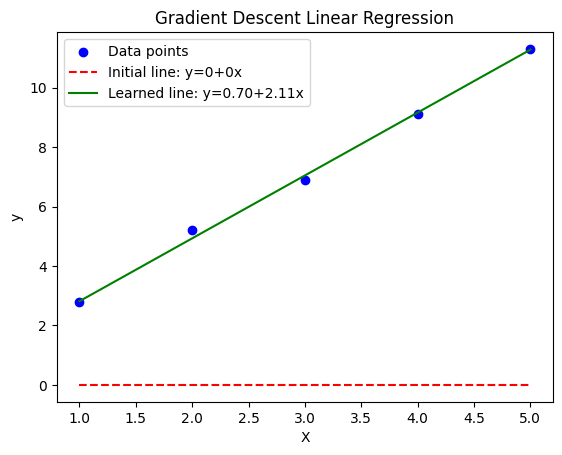

In [ ]:
X = input[:,0]
y = input[:,1]

# Initial parameters
b0_init = 0
b1_init = 0

# Learned parameters from gradient descent
b0_learned = b0
b1_learned = b1

# Plot data points
plt.scatter(X, y, color='blue', label='Data points')

# Plot initial line
y_init = b0_init + b1_init * X
plt.plot(X, y_init, 'r--', label=f'Initial line: y={b0_init}+{b1_init}x')

# Plot learned line
y_final = b0_learned + b1_learned * X
plt.plot(X, y_final, 'g-', label=f'Learned line: y={b0_learned:.2f}+{b1_learned:.2f}x')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Gradient Descent Linear Regression')
plt.legend()
plt.show()